In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/Clothing_Reviews.csv'

In [ ]:
import pandas as pd
data = pd.read_csv(dataset_path)
data.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt



# Basic EDA
# Summary statistics
summary = data.describe()
summary


,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


## Ratings

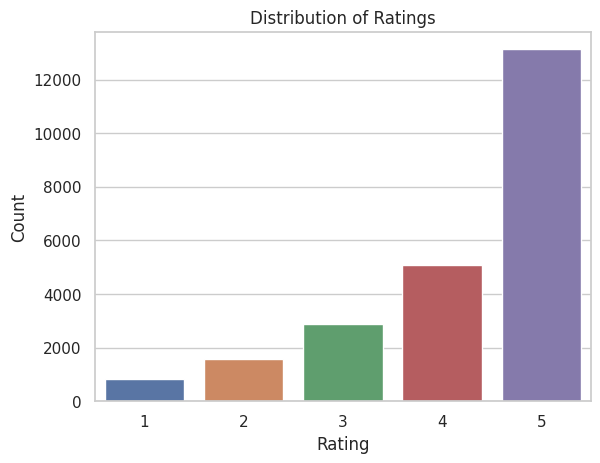

In [ ]:
# Create a bar chart for Rating
sns.set(style="whitegrid")
sns.countplot(data=data, x="Rating")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

# Show the plot
plt.show()



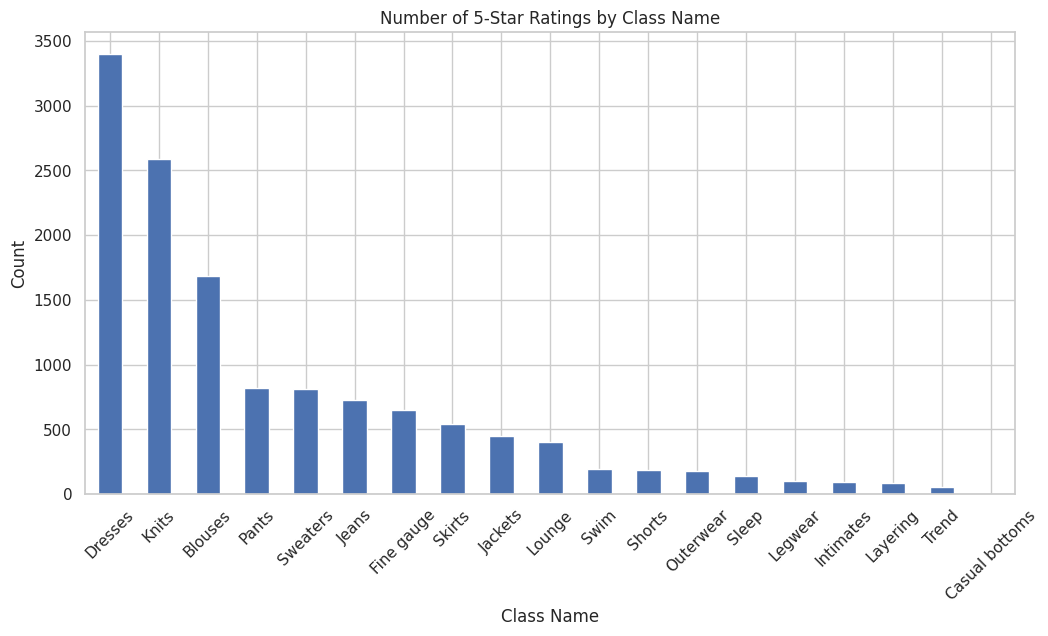

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
#data = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset file path

# Filter the dataset to include only 5-star ratings (you can change 5 to any other rating as needed)
five_star_ratings = data[data['Rating'] == 5]

# Count the number of occurrences of each class name in the filtered data
class_counts = five_star_ratings['Class Name'].value_counts()

# Create a bar chart to visualize which class has more 5-star ratings
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
class_counts.plot(kind='bar')
plt.title('Number of 5-Star Ratings by Class Name')
plt.xlabel('Class Name')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
#same charts using plotly
import pandas as pd
import plotly.express as px

# Load the dataset
#data = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset file path

# Filter the dataset to include only 5-star ratings
five_star_ratings = data[data['Rating'] == 5]

# Create a bar chart for Division Name with Plotly
division_counts = five_star_ratings['Division Name'].value_counts().reset_index()
division_counts.columns = ['Division Name', 'Count']

fig = px.bar(
    division_counts,
    x='Division Name',
    y='Count',
    title='Number of 5-Star Ratings by Division Name',
    color='Division Name',
)

fig.update_xaxes(categoryorder='total ascending')
fig.show()

# Create a bar chart for Department Name with Plotly
department_counts = five_star_ratings['Department Name'].value_counts().reset_index()
department_counts.columns = ['Department Name', 'Count']

fig = px.bar(
    department_counts,
    x='Department Name',
    y='Count',
    title='Number of 5-Star Ratings by Department Name',
    color='Department Name',
)

fig.update_xaxes(categoryorder='total ascending')
fig.show()


# Create a bar chart for Class Name with Plotly
class_counts = five_star_ratings['Class Name'].value_counts().reset_index()
class_counts.columns = ['Class Name', 'Count']

fig = px.bar(
    class_counts,
    x='Class Name',
    y='Count',
    title='Number of 5-Star Ratings by Class Name',
    color='Class Name',
)

fig.update_xaxes(categoryorder='total ascending')
fig.show()



In [ ]:

# Create a bar chart to visualize the number of recommendations by rating
recommendation_counts = data.groupby(['Rating', 'Recommended IND']).size().reset_index()
recommendation_counts.columns = ['Rating', 'Recommended IND', 'Count']

fig = px.bar(
    recommendation_counts,
    x='Rating',
    y='Count',
    color='Recommended IND',
    title='Number of Recommendations by Rating',
    labels={'Rating': 'Rating', 'Count': 'Count', 'Recommended IND': 'Recommended'}
)

fig.show()


## AGE

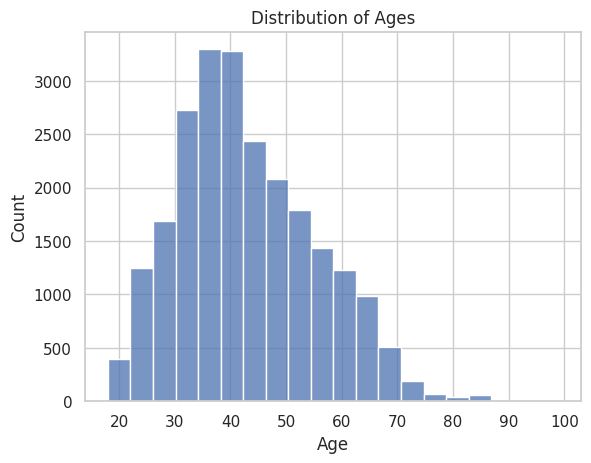

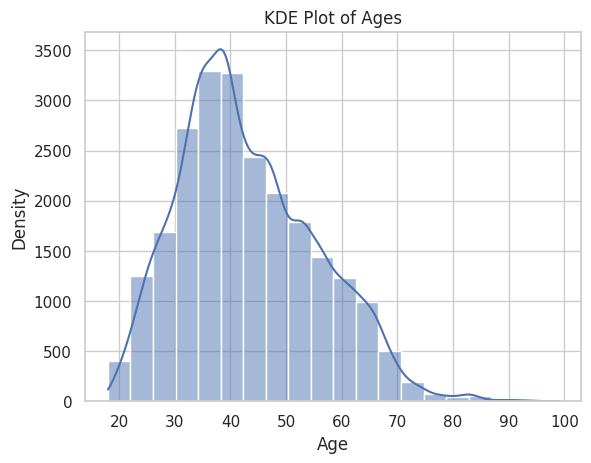

In [ ]:
# Create a histogram for Age
sns.set(style="whitegrid")
sns.histplot(data=data, x="Age", bins=20, kde=False)
plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Count")

# Show the plot
plt.show()

# Create a KDE plot for Age
sns.set(style="whitegrid")
sns.histplot(data=data, x="Age", bins=20, kde=True)
plt.title("KDE Plot of Ages")
plt.xlabel("Age")
plt.ylabel("Density")

# Show the plot
plt.show()








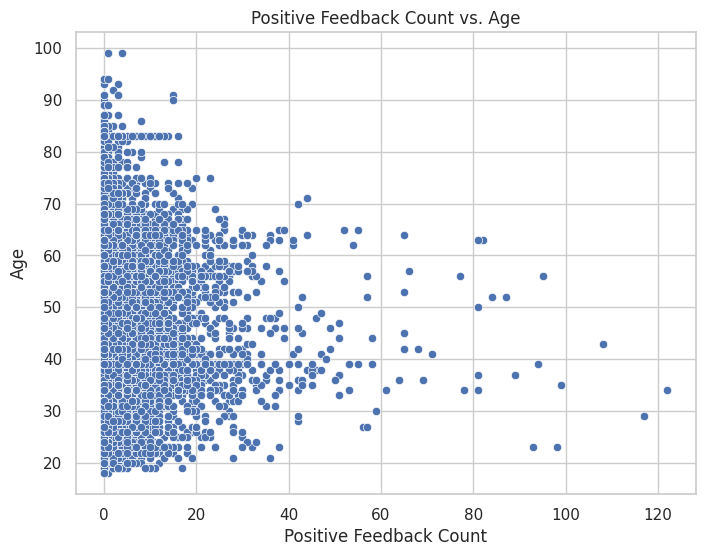

In [ ]:
# Create a scatter plot for Positive Feedback Count vs. Age
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Positive Feedback Count', y='Age')
plt.title('Positive Feedback Count vs. Age')
plt.xlabel('Positive Feedback Count')
plt.ylabel('Age')

# Show the plot
plt.show()


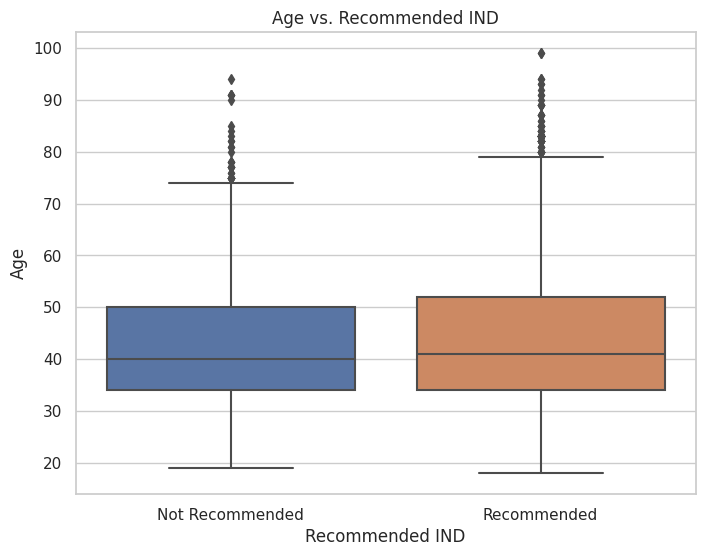

In [ ]:

# Create a box plot to visualize Age vs. Recommended IND
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Recommended IND', y='Age')
plt.title('Age vs. Recommended IND')
plt.xlabel('Recommended IND')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Recommended', 'Recommended'])

# Show the plot
plt.show()


## DISTRIBUTION

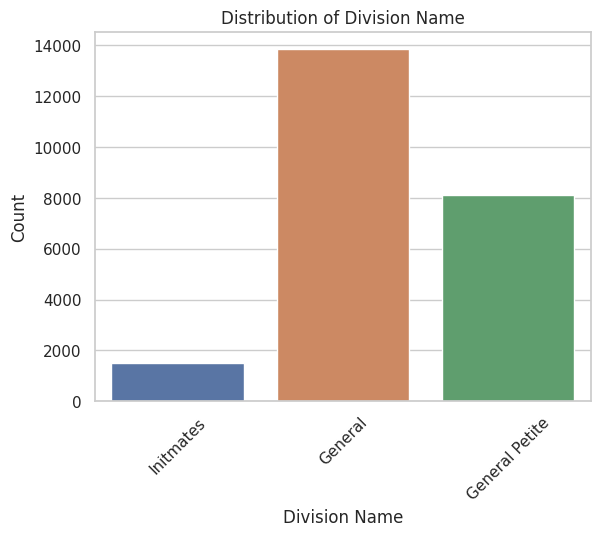

In [ ]:
# Create a bar chart for Division Name
sns.set(style="whitegrid")
sns.countplot(data=data, x="Division Name")
plt.title("Distribution of Division Name")
plt.xlabel("Division Name")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [ ]:
#Create a bar chart for Division Name
division_counts = data['Division Name'].value_counts().reset_index()
division_counts.columns = ['Division Name', 'Count']

fig = px.bar(division_counts, x='Division Name', y='Count', title='Distribution of Division Name')
fig.show()

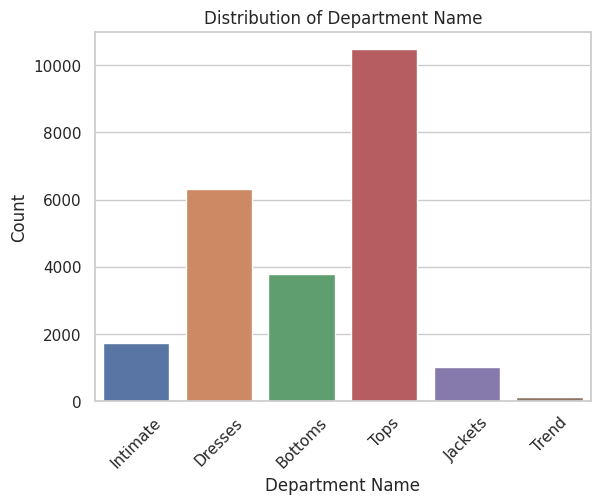

In [ ]:
# Create a bar chart for Department Name
sns.set(style="whitegrid")
sns.countplot(data=data, x="Department Name")
plt.title("Distribution of Department Name")
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

# Create a bar chart for Department Name
department_counts = data['Department Name'].value_counts().reset_index()
department_counts.columns = ['Department Name', 'Count']

fig = px.bar(
    department_counts,
    x='Department Name',
    y='Count',
    title='Distribution of Department Name',
    color='Department Name'  # Specify the column to use for colors
)

fig.show()


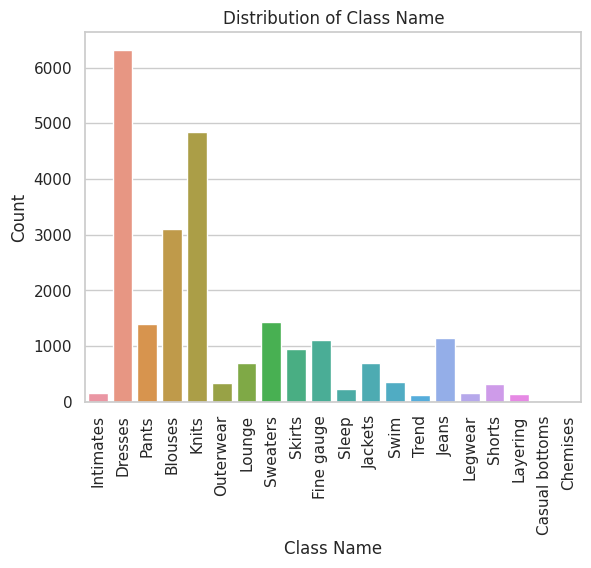

In [ ]:
# Create a bar chart for Class Name
sns.set(style="whitegrid")
sns.countplot(data=data, x="Class Name")
plt.title("Distribution of Class Name")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [ ]:


import pandas as pd
import plotly.express as px

# Create a bar chart for Class Name with different colors
class_counts = data['Class Name'].value_counts().reset_index()
class_counts.columns = ['Class Name', 'Count']

fig = px.bar(
    class_counts,
    x='Class Name',
    y='Count',
    title='Distribution of Class Name',
    color='Class Name'  # Specify the column to use for colors
)

fig.show()




## Recommended Ind

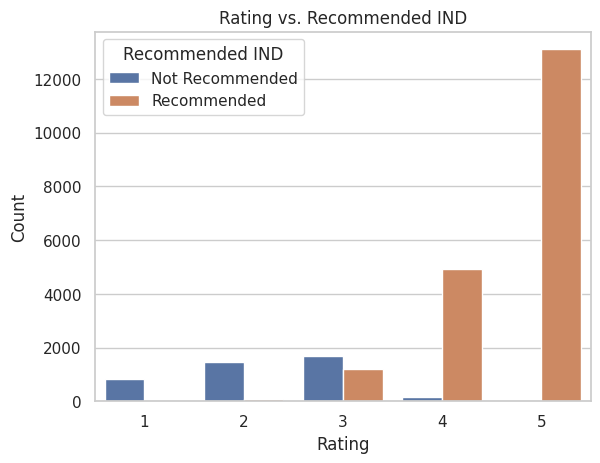

In [ ]:

# Create a countplot to visualize Rating vs. Recommended IND
sns.countplot(data=data, x='Rating', hue='Recommended IND')
plt.title('Rating vs. Recommended IND')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Recommended IND', labels=['Not Recommended', 'Recommended'])

# Show the plot
plt.show()


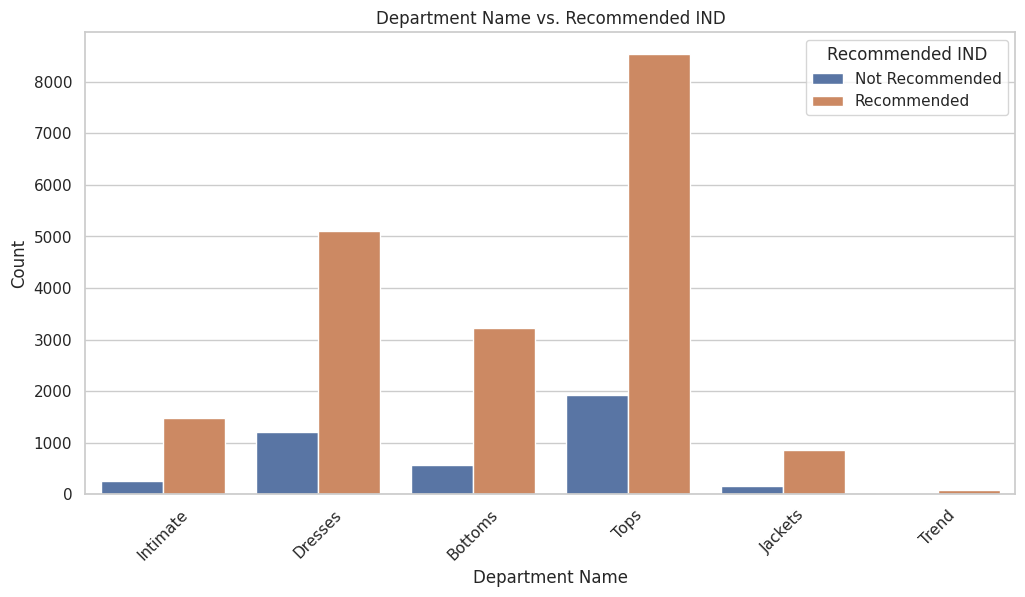

In [ ]:
# Create a countplot to visualize Department Name vs. Recommended IND
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Department Name', hue='Recommended IND')
plt.title('Department Name vs. Recommended IND')
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Recommended IND', labels=['Not Recommended', 'Recommended'])

# Show the plot
plt.show()


## positive feedback count

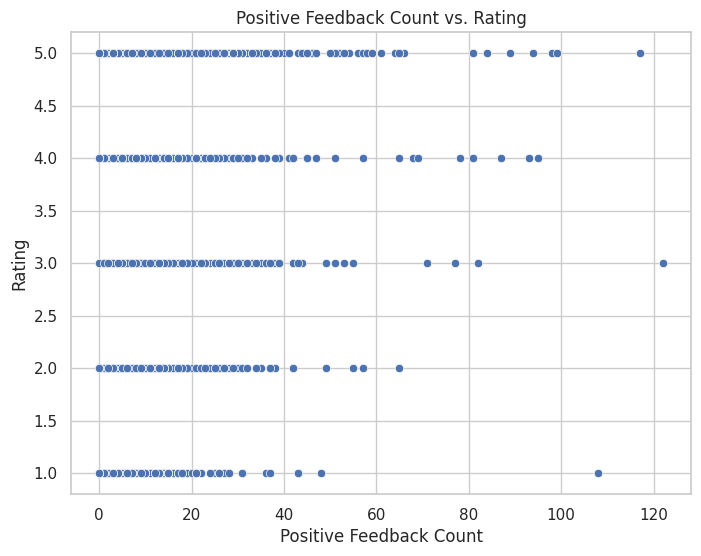

In [ ]:
# Create a scatter plot for Positive Feedback Count vs. Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Positive Feedback Count', y='Rating')
plt.title('Positive Feedback Count vs. Rating')
plt.xlabel('Positive Feedback Count')
plt.ylabel('Rating')

# Show the plot
plt.show()


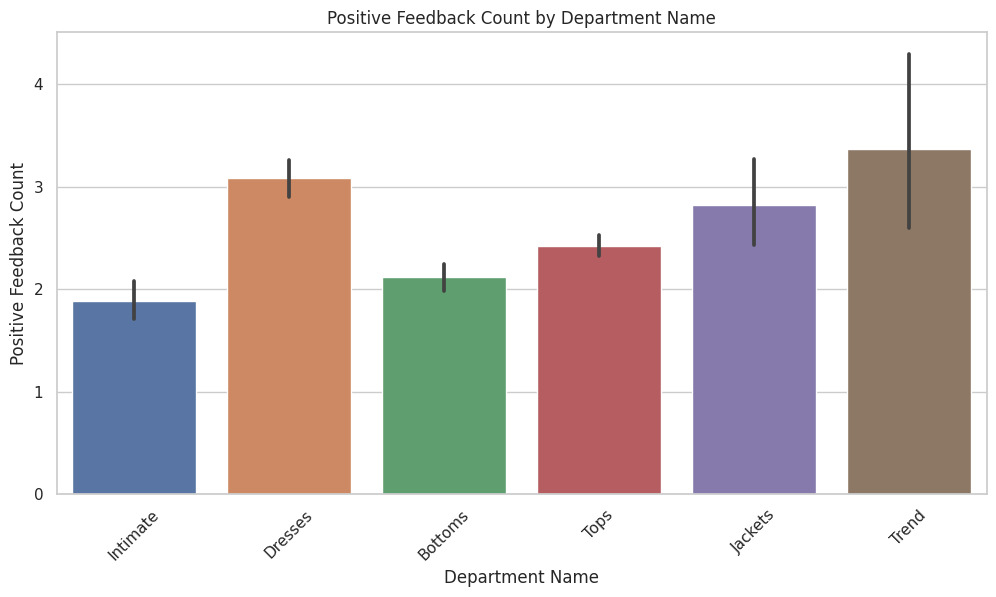

In [ ]:
# Create a bar chart for Positive Feedback Count by Department Name
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Department Name', y='Positive Feedback Count')
plt.title('Positive Feedback Count by Department Name')
plt.xlabel('Department Name')
plt.ylabel('Positive Feedback Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
print("\nUnique Values in Each Column:")
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"{column}: {unique_values}")


Unique Values in Each Column:
Unnamed: 0: 23486
Clothing ID: 1206
Age: 77
Title: 13993
Review Text: 22634
Rating: 5
Recommended IND: 2
Positive Feedback Count: 82
Division Name: 3
Department Name: 6
Class Name: 20


In [ ]:
print("\nValue Counts in a Specific Column (e.g., 'Department Name'):")
value_counts = data['Department Name'].value_counts()
print(value_counts)



Value Counts in a Specific Column (e.g., 'Department Name'):
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64


In [ ]:
print("\nClass Balance in the Target Variable:")
class_balance = data['Rating'].value_counts()
print(class_balance)



Class Balance in the Target Variable:
5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64



Data Distribution (Histograms for Numeric Columns):


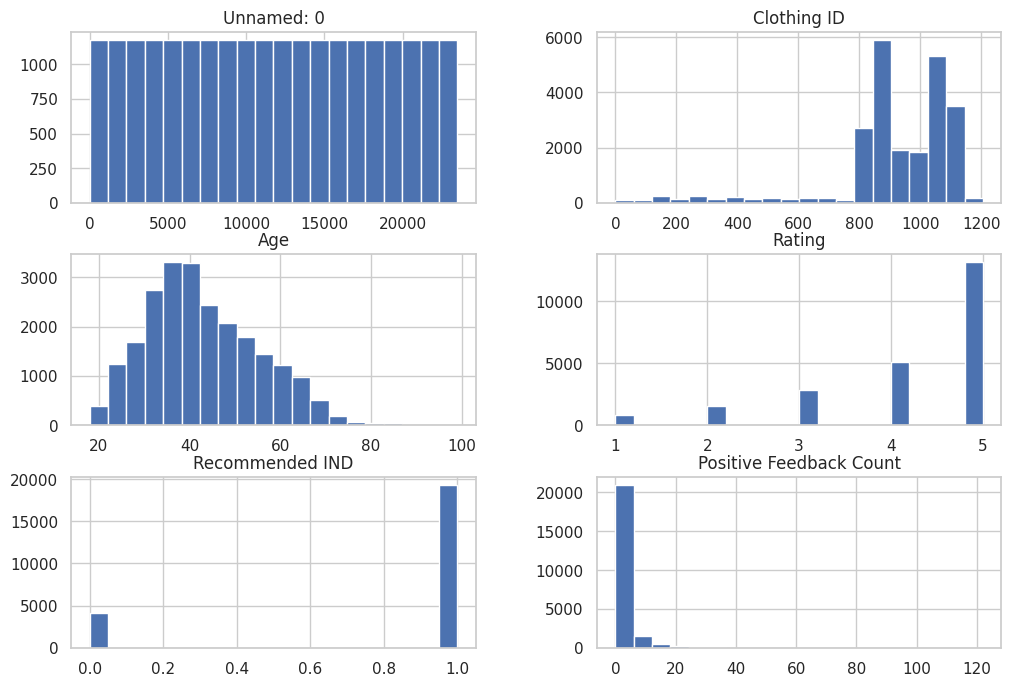

In [ ]:
import matplotlib.pyplot as plt

print("\nData Distribution (Histograms for Numeric Columns):")
numeric_columns = data.select_dtypes(include='number')
numeric_columns.hist(bins=20, figsize=(12, 8))
plt.show()
